# TITANIC SURVIVAL PREDICTION

-Use the Titanic dataset to build a model that predicts whether a
 passenger on the Titanic survived or not. This is a classic beginner
 project with readily available data.
 
 -The dataset typically used for this project contains information
 about individual passengers, such as their age, gender, ticket
 class, fare, cabin, and whether or not they survived.

# Importing libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv(r"C:\Users\Dawood MD\OneDrive\Desktop\Codsoft\Titanic archive (1)\Titanic-Dataset.csv")

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


EDA (exploratory Data Analysis)

In [4]:
data.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Drop All the unnecessary data from the dataset

In [6]:
data.duplicated().sum()

0

In [7]:
data.drop("Name",axis=1,inplace=True)
data.drop("Ticket",axis=1,inplace=True)
data.drop("PassengerId",axis=1,inplace=True)
data.drop("Cabin",axis=1,inplace=True)
data.drop("Embarked",axis=1,inplace=True)

In [8]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000
887,1,1,female,19.0,0,0,30.0000
888,0,3,female,NaN,1,2,23.4500
889,1,1,male,26.0,0,0,30.0000


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Sex']=le.fit_transform(data['Sex'])
df = data 

In [10]:
data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,NaN,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


In [11]:
# Splitting the data in X and y Columns
y = data['Survived']
X = data.iloc[:,1:]

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     714 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


Deleting the column with missing data

In [13]:
df_1 = X.dropna(axis=1)

In [14]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   SibSp   891 non-null    int64  
 3   Parch   891 non-null    int64  
 4   Fare    891 non-null    float64
dtypes: float64(1), int32(1), int64(3)
memory usage: 31.5 KB


Model Building with removing the NaN value column i,e 'Age'

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#spliting the data in training and testing 
x_train,x_test,y_train,y_test = train_test_split(df_1,y,test_size=0.3,random_state=42)
#buliding a model from a dataframe without Age column
lr = LogisticRegression()
model_1 = lr.fit(x_train,y_train)
pred = model_1.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred))

Accuracy: 0.7985074626865671


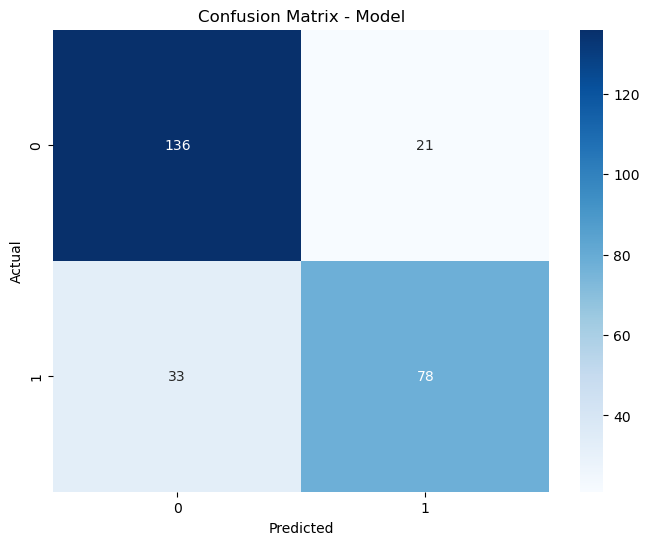

In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for model
cm_model = confusion_matrix(y_test, pred)

# Plot confusion matrix for model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model')
plt.show()

Similarly Deleting the column with missing data

In [17]:
df_2 = df.dropna(axis=0)

In [18]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  714 non-null    int64  
 1   Pclass    714 non-null    int64  
 2   Sex       714 non-null    int32  
 3   Age       714 non-null    float64
 4   SibSp     714 non-null    int64  
 5   Parch     714 non-null    int64  
 6   Fare      714 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 41.8 KB


In [19]:
y_1 = df_2['Survived']
X_1 = df_2.iloc[:,1:]

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#spliting the data in training and testing 
x_train,x_test,y_train,y_test = train_test_split(X_1,y_1,test_size=0.3,random_state=42)
#buliding a model from a dataframe without Age column
lr = LogisticRegression()
model_2 = lr.fit(x_train,y_train)
pred = model_2.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred))

Accuracy: 0.772093023255814


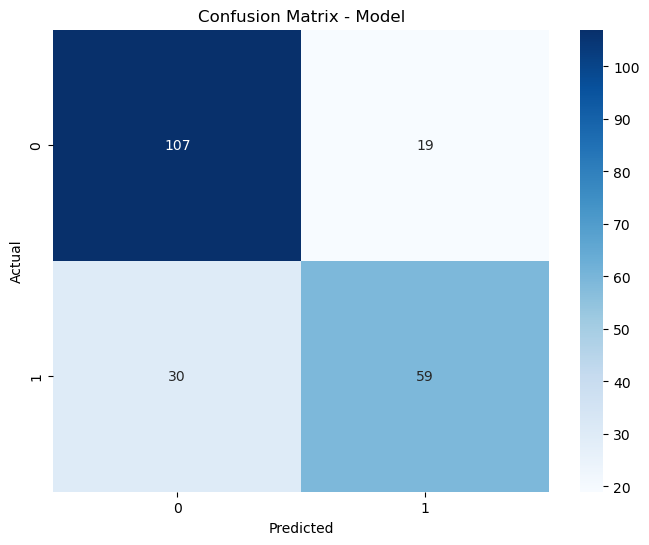

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for model
cm_model = confusion_matrix(y_test, pred)

# Plot confusion matrix for model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model')
plt.show()

Similarly for the Imputation of NaN values |Filling the Missing Values – Imputation

In [22]:
df_3 = df.fillna(df["Age"].mean())
df_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [23]:
y_3 = df_3['Survived']
X_3 = df_3.iloc[:,1:]

In [24]:
y_3.info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Survived
Non-Null Count  Dtype
--------------  -----
891 non-null    int64
dtypes: int64(1)
memory usage: 7.1 KB


In [25]:
X_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Pclass  891 non-null    int64  
 1   Sex     891 non-null    int32  
 2   Age     891 non-null    float64
 3   SibSp   891 non-null    int64  
 4   Parch   891 non-null    int64  
 5   Fare    891 non-null    float64
dtypes: float64(2), int32(1), int64(3)
memory usage: 38.4 KB


In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#spliting the data in training and testing 
x_train,x_test,y_train,y_test = train_test_split(X_3,y_3,test_size=0.3,random_state=42)
#buliding a model from a dataframe without Age column
lr = LogisticRegression()
model_2 = lr.fit(x_train,y_train)
pred = model_2.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred))

Accuracy: 0.8134328358208955


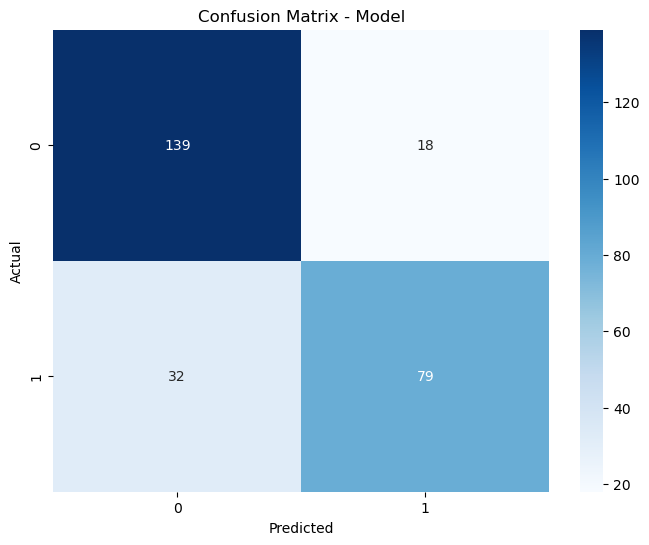

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for model
cm_model = confusion_matrix(y_test, pred)

# Plot confusion matrix for model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model')
plt.show()

Simple Imputer Method 

In [28]:
df_4 = df

In [29]:
df_4['Missing age values'] = df_4['Age'].isnull()

In [30]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    int64  
 1   Pclass              891 non-null    int64  
 2   Sex                 891 non-null    int32  
 3   Age                 714 non-null    float64
 4   SibSp               891 non-null    int64  
 5   Parch               891 non-null    int64  
 6   Fare                891 non-null    float64
 7   Missing age values  891 non-null    bool   
dtypes: bool(1), float64(2), int32(1), int64(4)
memory usage: 46.2 KB


In [31]:
from sklearn.impute import SimpleImputer
my_imputer = SimpleImputer(strategy = 'median')
data_new = my_imputer.fit_transform(df_4)
df_5 = pd.DataFrame(data_new,columns=['Survived','Pclass','Sex','Age','SibSp','Parch','Fare','Missing age values'])
df_5.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Survived            891 non-null    float64
 1   Pclass              891 non-null    float64
 2   Sex                 891 non-null    float64
 3   Age                 891 non-null    float64
 4   SibSp               891 non-null    float64
 5   Parch               891 non-null    float64
 6   Fare                891 non-null    float64
 7   Missing age values  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [49]:
y_4 = df_5['Survived']
X_4 = df_5.iloc[:,1:]
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

#spliting the data in training and testing 
x_train,x_test,y_train,y_test = train_test_split(X_4,y_4,test_size=0.3,random_state=42)
#buliding a model from a dataframe without Age column
lr = LogisticRegression()
pred = model_2.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test,pred))

Accuracy: 0.8059701492537313


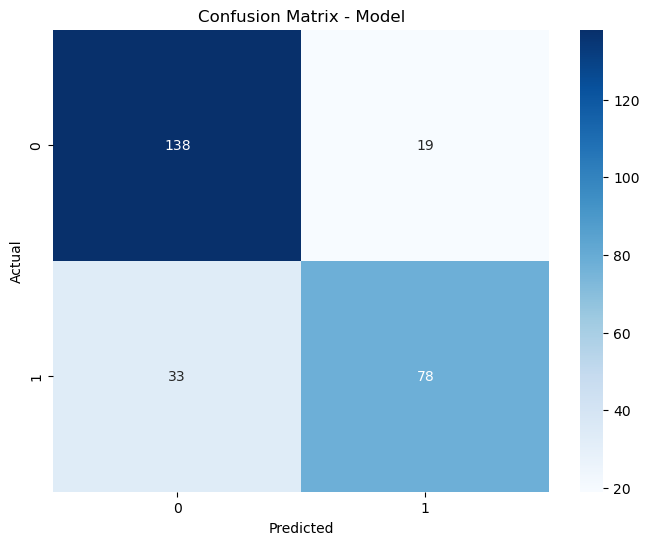

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for model
cm_model = confusion_matrix(y_test, pred)

# Plot confusion matrix for model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model')
plt.show()

Filling with a Regression Model

In this case, the null values in one column are filled by fitting a regression model using other columns in the dataset.

I.e. in this case the regression model will contain all the columns except Age in X and Age in Y.

Then after filling the values in the Age column, then we will use logistic regression to calculate accuracy.

In [42]:
import warnings
warnings.filterwarnings("ignore")

In [43]:
from sklearn.linear_model import LinearRegression
import warnings
lr = LinearRegression()
df.head()
testdf = df[df['Age'].isnull()==True]
traindf = df[df['Age'].isnull()==False]
y = traindf['Age']
traindf.drop("Age",axis=1,inplace=True)
lr.fit(traindf,y)
testdf.drop("Age",axis=1,inplace=True)
pred = lr.predict(testdf)
testdf['Age']= pred

In [44]:
traindf['Age']=y

In [45]:
y = traindf['Survived']
traindf.drop("Survived",axis=1,inplace=True)
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(traindf,y)

LogisticRegression()

In [46]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

LogisticRegression()

In [47]:
y_test = testdf['Survived']
testdf.drop("Survived",axis=1,inplace=True)
pred = lr.predict(testdf)

In [48]:
print(metrics.accuracy_score(pred,y_test))

0.8361581920903954


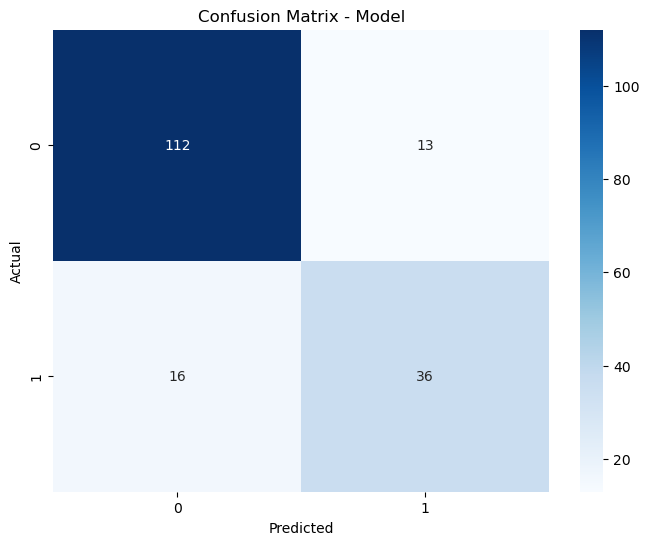

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix for model
cm_model = confusion_matrix(y_test, pred)

# Plot confusion matrix for model
plt.figure(figsize=(8, 6))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Model')
plt.show()